<a href="https://colab.research.google.com/github/Angelos-Seizas/RSE-for-open-quantum-systems/blob/main/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Toy model description
Our initial focus centers on a triple quantum well configuration, a simplified system serving as a foundational model for further exploration. Both the Resonant State Expansion (RSE) and Newton-Raphson's (NR) method can be applied to solve this system, facilitating a comparative analysis of their results. This comparison is used to substantiate the accuracy and convergence of the RSE.\
The potential profile of this model consists of an unperturbed double well $V(x)$ serving as the basis, and an additional third well situated between the two basis wells, functioning as a perturbation $\Delta V(x)$. The potential function is represented by the following expression:

$$V(x) + \Delta V(x) = -\gamma[\delta(x-a)+\delta(x+a)]+(-\beta\delta(x-b)$$

Here, $\gamma$ is the strength of the basis wells, $\beta$ is the strength of the perturber, $a$ is the mid-point distance between the basis wells, and $b$ is the position of the perturber relative to $a$.\
The parameters of our system are:

*   a = 1
*   b = -0.4
*   β = 55
*   γ = 10


## Establishing the basis
After importing rse.py, the first step for any kind of analysis using RSE is to compute the resonant state eigenvalues of the basis. This is done using the $basis()$ function.\
Recall that the required parameters for $basis()$ are, in order: $\gamma$, $p$, and $N$.

*   $\gamma$, as already defined earlier, is the strength of the basis wells.
*   $p$ is the parity. The secular equation of the double well is parity-symmetric and offers two distinct sets of solutions, one due to even symmetry and one due to odd symmetry. A value of "1" for $p$ signifies even parity, whereas a value of "-1" signifies odd parity. Consequently, to construct a complete set of basis states, $basis()$ must be executed twice – once for $p=1$ and once for $p=-1$. It is important that the even and odd solutions be stored in separate arrays for $RSE()$ to function correctly.
*   $N$ is the range of guess values to be considered by the NR algorithm. The greater the range, the more roots that can be found by NR and, in turn, the more accurate the RSE can be.

Based on the above considerations and the given parameters, the $basis()$ must be executed as follows:

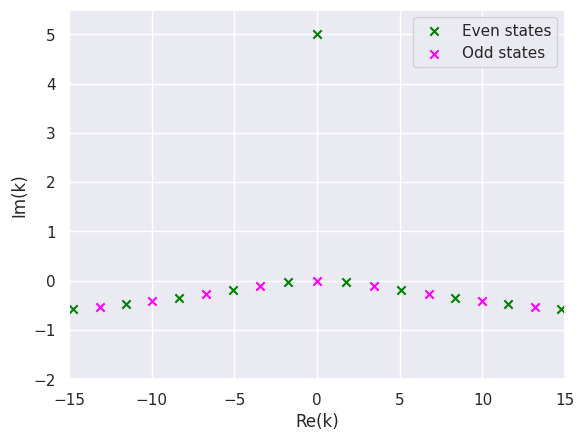

In [1]:
import rse
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook')

#Computing the basis states
even = rse.basis(10,1,10000,verbose=False) # p=1 computes the even states
odd = rse.basis(10,-1,10000,verbose=False) # p=-1 computes the odd states

#Plotting part of the results
plt.figure()
plt.scatter(even.real, even.imag, marker='x', color='green', label='Even states')
plt.scatter(odd.real, odd.imag, marker='x', color='magenta', label='Odd states')
plt.xlabel('Re(k)')
plt.ylabel('Im(k)')
plt.xlim(-15,15)
plt.ylim(-2,5.5)
plt.legend()

**Important consideration:** There is no actual eigenvalue located at (0,0) in the plot. That specific point is northing more than an artifact from Newton-Raphson's algorithm. The current implementation of the algorithm mistakenly identifies poles as roots. Fortunately, the secular equation utilised in our case has only one pole.\
Make sure you find the position of the artifact within its array and delete it.

**Note:** For wide ranges of guess values, $newton()$ can be time-consuming. To save time, it is recommended to save the computed $even$ and $odd$ arrays as files and load them into your script at the start of each new session instead of recalculating these arrays from scratch.

In [2]:
odd = np.delete(odd,920) # Deleting the NR artifact

# Resonant State Expansion

The required parameters for the $RSE()$ function are, in order: $γ$, $even$, $odd$, $*p$. The last parameter is a tuple containing the strength and position values for each perturber. In our current scenario, there is only one perturber, hence $*p = -0.4,55$. The strength argument always follows the position argument for each perturber.\
To compute the eigenvalues and eigenfunctions of our system using the RSE, we apply the $RSE()$ function as follows:

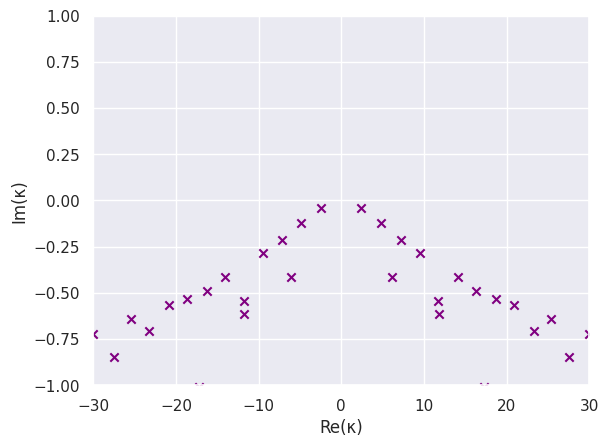

In [3]:
κ, φ = rse.RSE(10,even,odd,-0.4,55,verbose=False,plot=True,eig=True)
# κ is an array containing the eigenvalues, φ is an array of the corresponding eigenfunctions.

If you don't set $eig = True$, only the eigenvalues will be computed.

# Verification of the Resonant State Expansion

For a comparative analysis between RSE and NR, employ the $RSE\_verif()$ function. Note that this function is exclusively designed for triple wells.\
The required parameters for $RSE\_verif()$ are, in order: $even$, $odd$, $b$, $\beta$, $\gamma$. Refer to the *Toy Model Description* section for the values of the relevant system parameters.

Elapsed time for RSE computation: 102.785 seconds.


/content/rse.py:368: ComplexWarning: Casting complex values to real discards the imaginary part
  diff[1:] = np.diff(roots)


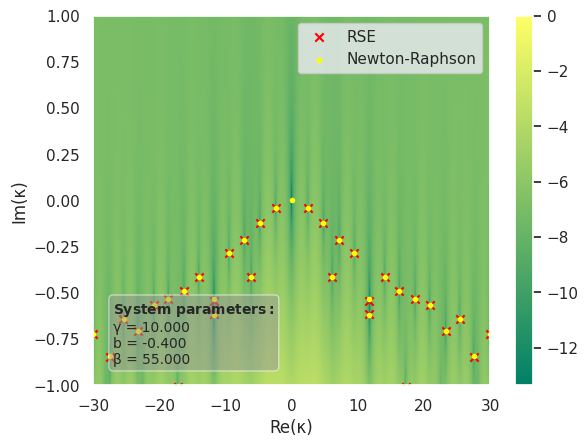

In [8]:
K, r = rse.RSE_verif(even,odd,-0.4,55,10,verbose=False)
# K is the array of the RSE solutions. r is the array of the NR solutions.

A complex 2D colormap of the secular equation is also plotted in the background as a visual sanity check for convergence. Darker shades indicate closer proximity to the roots.\
Note that the only apparent disagreement between RSE and NR is at the (0,0) coordinate because $newton()$ cannot distinghuish a pole from a root.

# Adding more perturbers

You can add an arbitrary number of perturbers as long as they are all positioned within the interaction region. For example, if we want to add three additional perturbers in our system, then $RSE()$ is executed as follows:


```
RSE(10,even,odd,-0.4,55,0.3,16,0.6,21,-0.1,5)
```

In this example, alongside the pre-defined perturber with position $b=-0.4$ and strength $\gamma=55$, three additional perturbers have been added, with positions at $0.3$, $0.6$, and $-0.1$, and their correspoding strengths being respectively $16$, $21$, and $5$. Recall that the perturbation parameters should be specified in position-strength pairs, with the strength argument always following the position argument for each perturber.

# Upcoming additions to this notebook

This notebook will soon feature additional examples, covering topics such as computing the wavefunctions and expansion coefficients from the eigenfunctions, discovering exceptional points in the parameter space, and showcasing methods for error analysis.